<IPython.core.display.Javascript object>


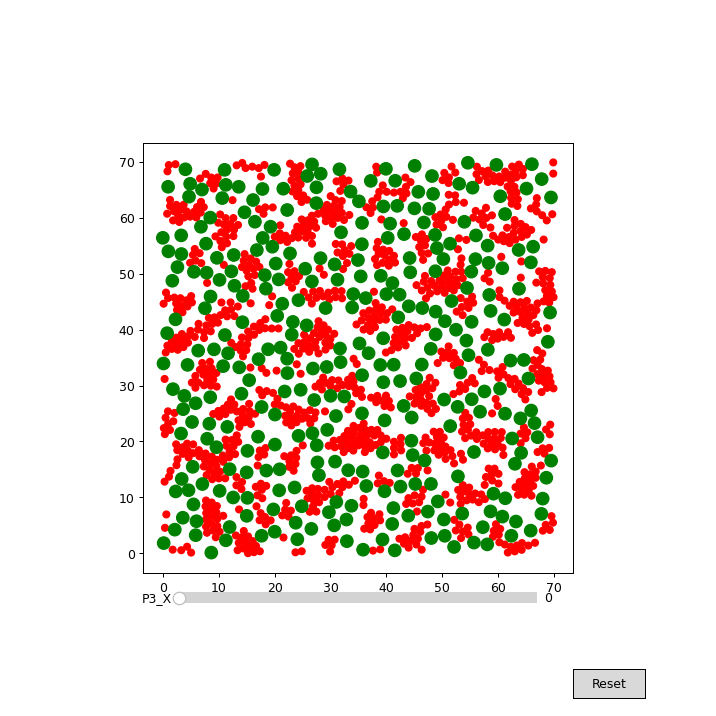

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from matplotlib.widgets import Slider, Button

# 43490 for figure 2 

p_type = []
x = []
y = []
c_type = ['b', 'r', 'g']


r_index = 0

Total_particles = 1050+300

#Total_particles = 525+1

#with open("Research_Data/Data_Size_2/Output_1/position4.txt", 'r') as f:
#with open("Research_Data/output/position8.txt", 'r') as f:
#with open("Research_Data/large/Position.txt", 'r') as f:
with open("source/repos/Particle_Simulation/out/build/x64-release/output/position.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)

for i in range(r_index,r_index + Total_particles):
    row = rows[i]
    p_type.append(c_type[int(row[0])])
    x.append(np.float32(row[1]))
    y.append(np.float32(row[2]))

size = []
markers = []

for i in range(0,len(x)):
    if (p_type[i] == 'g'):
        size.append(100)
        markers.append('o')
        #print("2",x[i],y[i])
    else:
        size.append(30)
        markers.append('.')
        #if (p_type[i] == 1):
            #print(x[i],y[i])
            
plt.rcParams["figure.figsize"] = (8,8)          
            
fig, ax = plt.subplots()
            
ax.scatter(x, y, s = size, c = p_type, marker = '.')

#adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8)

# Make a horizontal slider to control P3 X.
axfreq = fig.add_axes([0.25, 0.15, 0.5, 0.03])
p3x_slider = Slider(
    ax=axfreq,
    label='P3_X',
    valmin=0,
    valmax=60000,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):

    r_index = np.floor(p3x_slider.val / 100.0)

    r_index = r_index * Total_particles

    for i in range(0,Total_particles):
        row = rows[int(r_index) + i]
        p_type[i] = c_type[int(row[0])]
        x[i] = np.float32(row[1])
        y[i] = np.float32(row[2])

    for i in range(0,len(x)):
        if (p_type[i] == 'g'):
            #size[i] = 400
            size[i] = 100
            markers[i] = 'o'
        else:
            size[i] = 30
            markers[i] = 'o'
            
#     for i in range(0,len(x)):
#         if i == 503:
#             size[i] = 15
#         elif i == 389:
#             size[i] = 15
#         else:
#             size[i] = 1

    ax.clear()
    ax.scatter(x, y, c = p_type, s = size, marker = 'o')
#     ax.set_xlim([0, 15])
#     ax.set_ylim([0, 15])
    fig.canvas.draw_idle()

# register the update function with each slider
p3x_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    p3x_slider.reset()
    
button.on_clicked(reset)

plt.show()